In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'microdados_enem_2023 (2)/DADOS/MICRODADOS_ENEM_2023.csv', encoding="latin1", sep = ';')

In [5]:
data.shape

(3933955, 76)

#### Tratamento

In [39]:
df = data.copy()

In [40]:
colex = [
    'NU_INSCRICAO',
    'NU_ANO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TP_LINGUA',
    'TX_GABARITO_CN',
    'TX_GABARITO_CH',
    'TX_GABARITO_LC',
    'TX_GABARITO_MT',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5'
]

In [41]:
df.drop(columns = colex, inplace=True)

In [42]:
df['NU_FINAL'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

In [43]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL
0,14,M,2,1,1,1,17,1,NaN,0,...,C,B,B,A,B,B,A,A,B,NaN
1,12,M,2,1,0,1,16,1,NaN,0,...,A,B,B,A,A,C,A,D,B,NaN
2,6,F,1,1,1,1,0,1,NaN,0,...,A,A,B,A,A,A,A,A,B,507.94
3,2,F,1,3,1,2,0,2,1.0,0,...,A,A,B,A,A,D,A,A,B,564.28
4,3,F,1,3,1,2,0,2,1.0,0,...,A,A,B,A,A,B,A,A,A,425.38


In [44]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2594874
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2975449
NO_MUNICIPIO_ESC          2975449
CO_UF_ESC                 2975449
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
TP_SIT_FUNC_ESC           2975449
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
NU_NOTA_REDACAO           1111312
Q001                            0
Q002                            0
Q003                            0
Q004          

In [45]:
df = df.dropna(subset=['NU_FINAL', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',     'TP_ENSINO',
    'IN_TREINEIRO',
    'CO_MUNICIPIO_ESC',
    'NO_MUNICIPIO_ESC',
    'CO_UF_ESC',
    'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC'])

In [46]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
CO_MUNICIPIO_ESC          0
NO_MUNICIPIO_ESC          0
CO_UF_ESC                 0
SG_UF_ESC                 0
TP_DEPENDENCIA_ADM_ESC    0
TP_LOCALIZACAO_ESC        0
TP_SIT_FUNC_ESC           0
CO_MUNICIPIO_PROVA        0
NO_MUNICIPIO_PROVA        0
CO_UF_PROVA               0
SG_UF_PROVA               0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_MT                0
NU_NOTA_REDACAO           0
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                

In [47]:
df.shape

(708614, 52)

In [48]:
cols = [
    'TP_ENSINO',
    'IN_TREINEIRO',
    'CO_MUNICIPIO_ESC',
    'NO_MUNICIPIO_ESC',
    'CO_UF_ESC',
    'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC'
]

df[cols] = df[cols].fillna('Não Informado')

In [49]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
CO_MUNICIPIO_ESC          0
NO_MUNICIPIO_ESC          0
CO_UF_ESC                 0
SG_UF_ESC                 0
TP_DEPENDENCIA_ADM_ESC    0
TP_LOCALIZACAO_ESC        0
TP_SIT_FUNC_ESC           0
CO_MUNICIPIO_PROVA        0
NO_MUNICIPIO_PROVA        0
CO_UF_PROVA               0
SG_UF_PROVA               0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_MT                0
NU_NOTA_REDACAO           0
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                

In [50]:
df = df.drop(columns=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'CO_UF_PROVA', 'SG_UF_PROVA' ])

#### Enconding

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
print(df.dtypes)

TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
Q001                       object
Q002                       object
Q003                       object
Q004                       object
Q005                        int64
Q006                       object
Q007                       object
Q008                       object
Q009                       object
Q010                       object
Q011          

In [53]:
# Identificar colunas que são do tipo object (texto)
colunas_alfanumericas = df.select_dtypes(include=['object']).columns.tolist()

# Definir colunas candidatas para Label Encoding: tudo que NÃO é alfanumérico
colunas_label = df.columns.difference(colunas_alfanumericas)

colunas_label

Index(['CO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA', 'CO_UF_ESC', 'IN_TREINEIRO',
       'NU_FINAL', 'Q005', 'TP_ANO_CONCLUIU', 'TP_COR_RACA',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'TP_ESCOLA', 'TP_ESTADO_CIVIL',
       'TP_FAIXA_ETARIA', 'TP_LOCALIZACAO_ESC', 'TP_NACIONALIDADE',
       'TP_SIT_FUNC_ESC', 'TP_ST_CONCLUSAO'],
      dtype='object')

In [54]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

In [55]:
df.head(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL
3,2,0,1,3,1,2,0,2,1.0,0,...,0,0,1,0,0,3,0,0,1,564.28
4,3,0,1,3,1,2,0,2,1.0,0,...,0,0,1,0,0,1,0,0,0,425.38
11,3,1,1,3,4,2,0,2,1.0,0,...,0,0,1,0,0,1,0,1,1,671.12
16,4,0,1,1,1,2,0,2,1.0,0,...,0,0,1,0,0,3,1,0,1,586.04
41,3,1,1,1,1,2,0,2,1.0,0,...,0,0,1,0,0,1,0,0,1,584.94
46,2,0,1,1,1,2,0,2,1.0,0,...,0,1,2,1,1,4,1,2,1,485.96
48,3,0,1,3,1,2,0,2,1.0,0,...,0,0,1,0,0,1,0,0,1,658.92
64,3,1,1,2,1,2,0,2,1.0,0,...,0,0,3,0,0,3,0,1,1,634.20
66,3,0,1,1,1,2,0,2,1.0,0,...,0,0,1,0,0,2,0,1,1,611.18
77,2,0,0,2,2,2,0,2,1.0,0,...,0,0,1,0,0,0,0,0,1,300.72


In [56]:
df.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025', 'NU_FINAL'],
      dtype='object')

#### Kmeans para segmentação de grupos

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [58]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'KMeans Clustering')

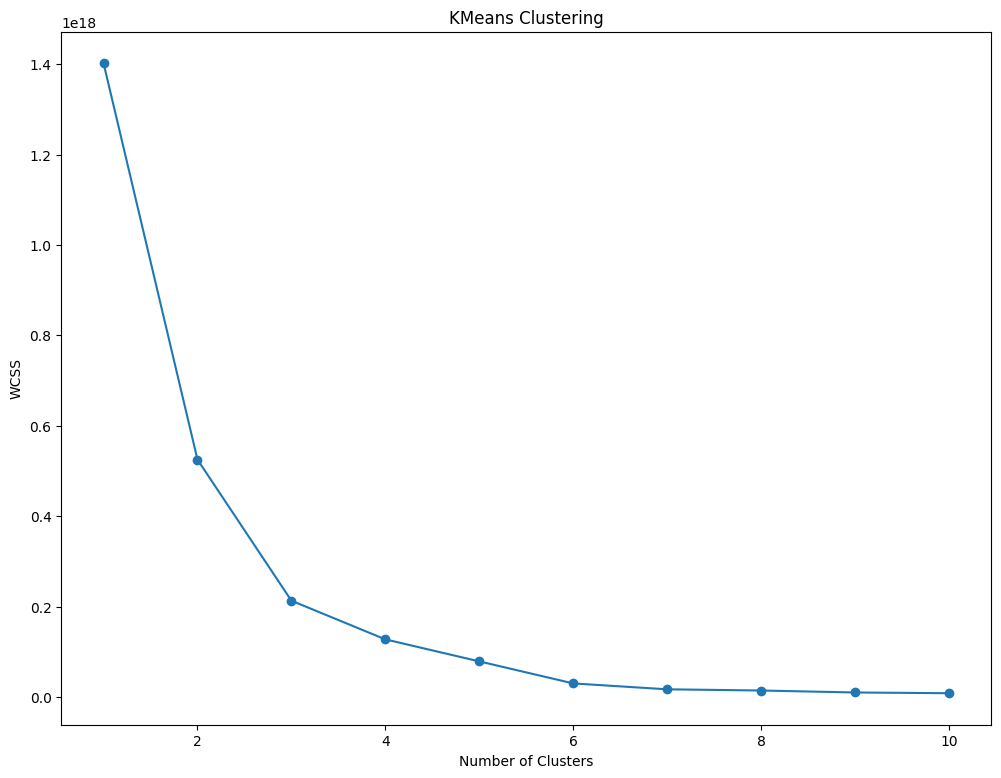

In [59]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans Clustering')

In [60]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

#### Resultados do Kmeans

In [61]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_ 

In [62]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,2.789876,0.455185,0.975303,2.291548,1.023668,2.0,0.0,2.171158,1.003036,0.0,...,0.016864,0.103398,1.233832,0.098965,0.174149,2.426776,0.048461,0.479862,0.864901,522.025129
1,2.691240,0.441577,0.987681,1.767388,1.027730,2.0,0.0,2.360013,1.003345,0.0,...,0.066753,0.429682,1.675663,0.212367,0.357964,2.920981,0.169294,1.054333,0.967723,567.689219
2,2.624520,0.440752,0.982572,1.631944,1.034518,2.0,0.0,2.269807,1.003784,0.0,...,0.078691,0.481259,1.623399,0.190954,0.340435,2.911417,0.141876,1.056244,0.973789,556.905617


In [63]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'NU_FINAL']].groupby(['Segment K-means']).count()
df_segm_analysis

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL,N Obs
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,2.789876,0.455185,0.975303,2.291548,1.023668,2.0,0.0,2.171158,1.003036,0.0,...,0.103398,1.233832,0.098965,0.174149,2.426776,0.048461,0.479862,0.864901,522.025129,249705
1,2.691240,0.441577,0.987681,1.767388,1.027730,2.0,0.0,2.360013,1.003345,0.0,...,0.429682,1.675663,0.212367,0.357964,2.920981,0.169294,1.054333,0.967723,567.689219,299284
2,2.624520,0.440752,0.982572,1.631944,1.034518,2.0,0.0,2.269807,1.003784,0.0,...,0.481259,1.623399,0.190954,0.340435,2.911417,0.141876,1.056244,0.973789,556.905617,159625


In [64]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/ df_segm_analysis['N Obs'].sum()
df_segm_analysis

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,,,,,,,
0,2.789876,0.455185,0.975303,2.291548,1.023668,2.0,0.0,2.171158,1.003036,0.0,...,1.233832,0.098965,0.174149,2.426776,0.048461,0.479862,0.864901,522.025129,249705,0.352385
1,2.691240,0.441577,0.987681,1.767388,1.027730,2.0,0.0,2.360013,1.003345,0.0,...,1.675663,0.212367,0.357964,2.920981,0.169294,1.054333,0.967723,567.689219,299284,0.422351
2,2.624520,0.440752,0.982572,1.631944,1.034518,2.0,0.0,2.269807,1.003784,0.0,...,1.623399,0.190954,0.340435,2.911417,0.141876,1.056244,0.973789,556.905617,159625,0.225264


In [65]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'GRUPO1', 
                                                                  1:'GRUPO2',
                                                                  2:'GRUPO3'})

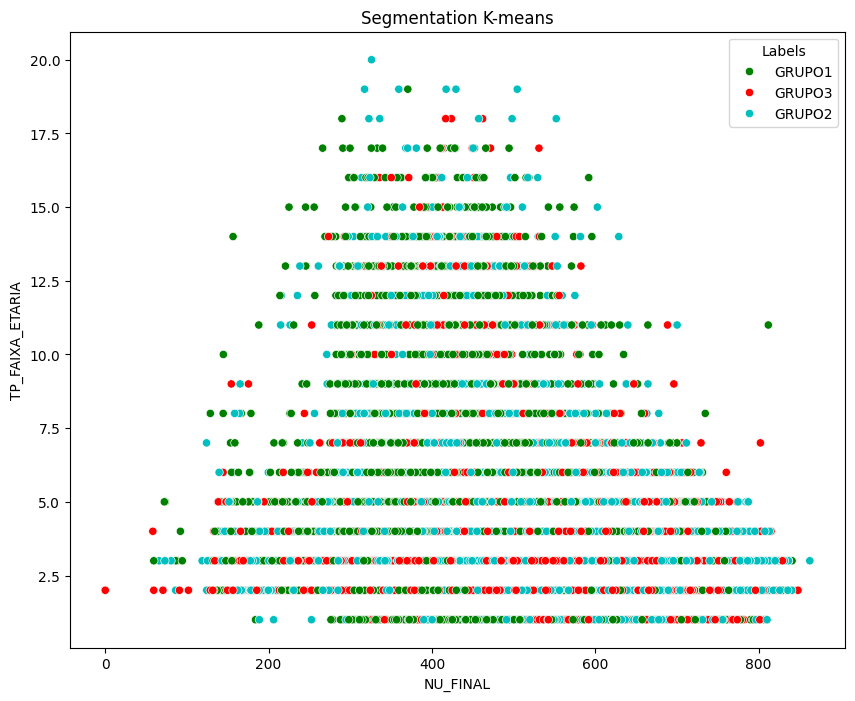

In [66]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['NU_FINAL']
y_axis = df_segm_kmeans['TP_FAIXA_ETARIA']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c'])
plt.title('Segmentation K-means')
plt.show()

#### Separação de treino e teste

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
df_sample = df.sample(frac=0.1, random_state=42)  # usa 10% dos dados (~300k linhas)

In [69]:
X = df_sample.drop(columns=['NU_FINAL'])
y = df_sample['NU_FINAL']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### Regressão Linear

In [71]:
# Criar e treinar o modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model_lr.predict(X_test)

# Calcular o MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.4f}")

Linear Regression MSE: 6526.1329


In [72]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

R²: 0.3222


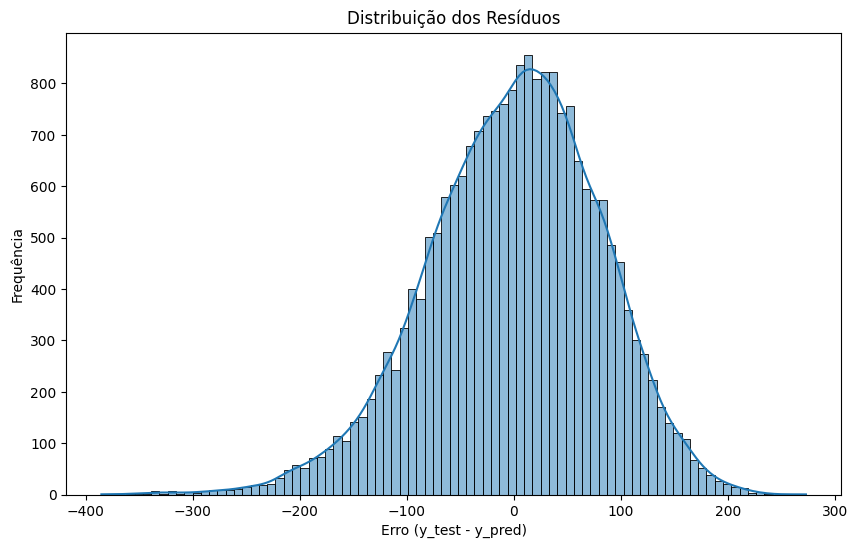

In [73]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro (y_test - y_pred)')
plt.ylabel('Frequência')
plt.show()

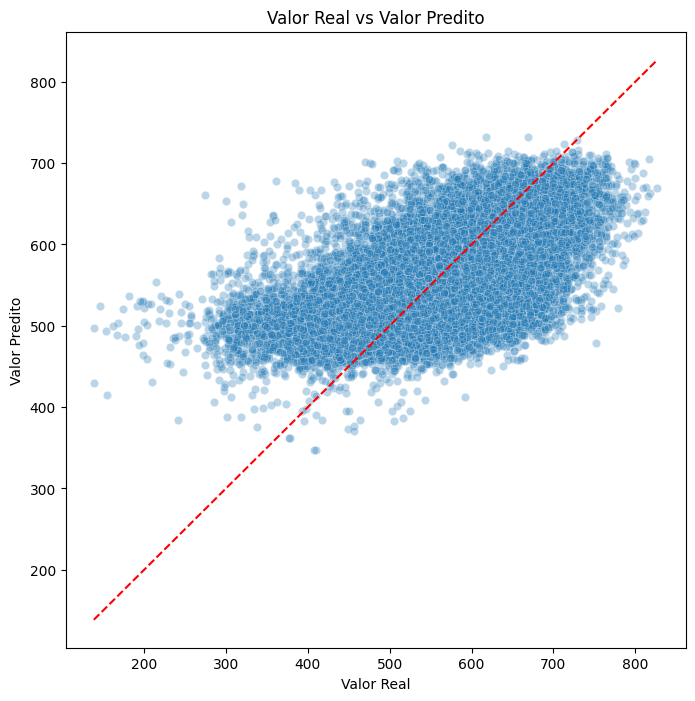

In [74]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valor Real vs Valor Predito')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.show()

#### Ao analisarmos o gráfico e os valores de r2 e MSE percebemos que o modelo não foi capaz de explicar com segurança os dados obtidos. Restando apenas que vejamos os próximos modelos.

#### RandomForest

In [75]:
# Instanciar o modelo
rf_model = RandomForestRegressor(
    n_estimators=20,    # número de árvores (padrão já é 100)
    max_depth=5,
    min_samples_split=10,# limite de profundidade (controla overfitting e tempo)
    random_state=42
)

# Treinar
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R2: {r2_rf:.4f}")

Random Forest MSE: 6326.0704
Random Forest R2: 0.3430


#### Ao analisarmos o gráfico e os valores de r2 e MSE percebemos que o modelo não foi capaz de explicar com segurança os dados obtidos. Restando apenas que vejamos os próximos modelos.

#### XGBRegressor

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Inicializa o modelo com parâmetros básicos
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=1
)

# Treina o modelo
xgb_model.fit(X_train, y_train)

# Faz a previsão
y_pred = xgb_model.predict(X_test)

# Calcula métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBRegressor MSE: {mse:.4f}")
print(f"XGBRegressor R2: {r2:.4f}")

XGBRegressor MSE: 5883.1748
XGBRegressor R2: 0.3890


In [78]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)

In [79]:
# Define os parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1]
}

# Configura o GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # otimiza pelo MSE
    cv=3,                             # 3 folds (pode ajustar)
    verbose=2,
    n_jobs=-1
)

# Rodar o GridSearch (pode demorar)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE:", -grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Melhor MSE: 5836.875944815484


In [80]:
r2 = grid_search.best_estimator_.score(X_test, y_test)
print(f"R2 do melhor modelo XGB: {r2:.4f}")

R2 do melhor modelo XGB: 0.3906


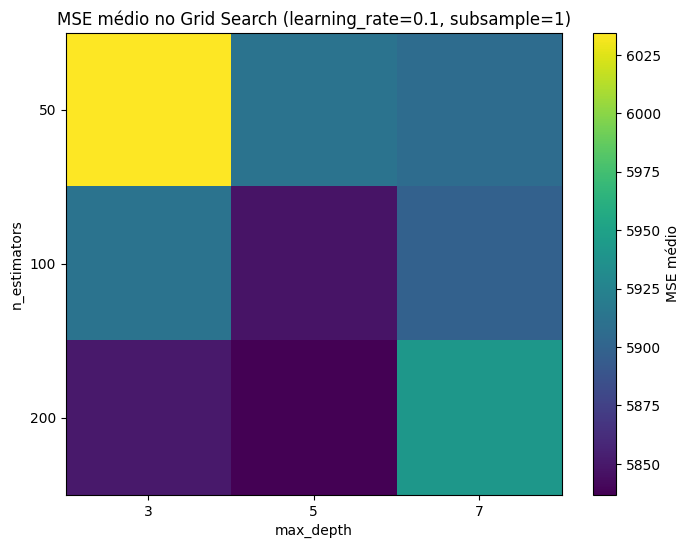

In [81]:
# Pega o resultado do GridSearch
results = pd.DataFrame(grid_search.cv_results_)

# Extrai as colunas de interesse
# Ajusta para ter média do score (neg MSE), e parametros testados
results['mean_test_MSE'] = -results['mean_test_score']

# Filtra só os valores para fixar learning_rate e subsample (exemplo: learning_rate=0.1 e subsample=1)
filtro = (results['param_learning_rate'] == 0.1) & (results['param_subsample'] == 1)

df_plot = results[filtro]

# Pivot table para o heatmap: linhas=n_estimators, colunas=max_depth, valores=mean_test_MSE
pivot_table = df_plot.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_MSE')

plt.figure(figsize=(8,6))
plt.title('MSE médio no Grid Search (learning_rate=0.1, subsample=1)')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='MSE médio')
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
plt.show()

#### Ao analisarmos o gráfico e os valores de r2 e MSE percebemos que o modelo não foi capaz de explicar com segurança os dados obtidos, mesmo utilizando de gridsearch para isso. Restando apenas que vejamos os próximos modelos.

##### XGB COM KMEANS

In [89]:
df_sample = df_segm_kmeans.sample(frac=0.1, random_state=42)  # usa 10% dos dados (~300k linhas)

In [90]:
X = df_sample.drop(columns=['NU_FINAL', 'Labels'])
y = df_sample['NU_FINAL']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [92]:
# Inicializa o modelo com parâmetros básicos
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=1
)

# Treina o modelo
xgb_model.fit(X_train, y_train)

# Faz a previsão
y_pred = xgb_model.predict(X_test)

# Calcula métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBRegressor MSE: {mse:.4f}")
print(f"XGBRegressor R2: {r2:.4f}")

XGBRegressor MSE: 5883.1748
XGBRegressor R2: 0.3890


In [93]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)

In [94]:
# Define os parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1]
}

# Configura o GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # otimiza pelo MSE
    cv=3,                             # 3 folds (pode ajustar)
    verbose=2,
    n_jobs=-1
)

# Rodar o GridSearch (pode demorar)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE:", -grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Melhor MSE: 5836.875944815484


In [95]:
r2 = grid_search.best_estimator_.score(X_test, y_test)
print(f"R2 do melhor modelo XGB: {r2:.4f}")

R2 do melhor modelo XGB: 0.3906


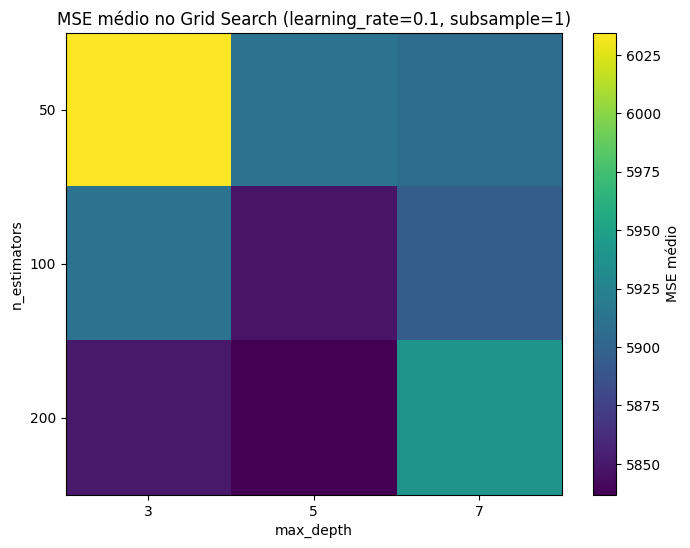

In [96]:
# Pega o resultado do GridSearch
results = pd.DataFrame(grid_search.cv_results_)

# Extrai as colunas de interesse
# Ajusta para ter média do score (neg MSE), e parametros testados
results['mean_test_MSE'] = -results['mean_test_score']

# Filtra só os valores para fixar learning_rate e subsample (exemplo: learning_rate=0.1 e subsample=1)
filtro = (results['param_learning_rate'] == 0.1) & (results['param_subsample'] == 1)

df_plot = results[filtro]

# Pivot table para o heatmap: linhas=n_estimators, colunas=max_depth, valores=mean_test_MSE
pivot_table = df_plot.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_MSE')

plt.figure(figsize=(8,6))
plt.title('MSE médio no Grid Search (learning_rate=0.1, subsample=1)')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='MSE médio')
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
plt.show()

#### O uso de Kmeans não foi efetivo no modelo, ressaltando a habilidade do xgboost reconhecer padrões e clusters.

#### USO DE PCA

In [97]:
df_sample = df.sample(frac=0.1, random_state=42)

In [98]:
X = df_sample.drop(columns=['NU_FINAL'])
y = df_sample['NU_FINAL']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [100]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Padroniza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=0.95)  # Mantém 95% da variância
X_pca = pca.fit_transform(X_scaled)

print(f'N° de componentes mantidos: {pca.n_components_}')

N° de componentes mantidos: 33


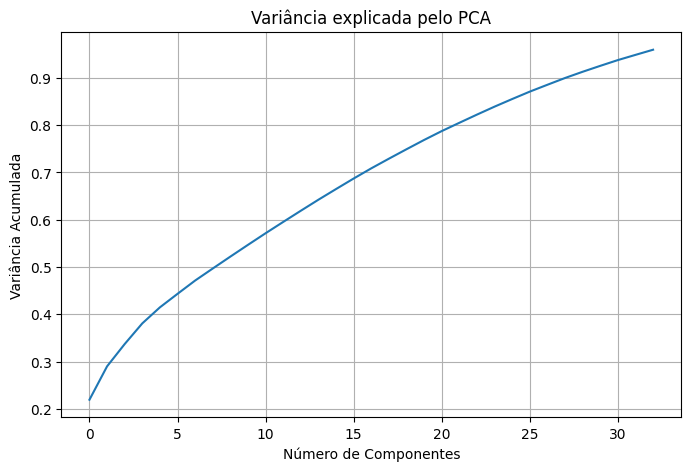

In [101]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância explicada pelo PCA')
plt.grid()
plt.show()

In [102]:
# Inicializa o modelo com parâmetros básicos
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=1
)

# Treina o modelo
xgb_model.fit(X_train, y_train)

# Faz a previsão
y_pred = xgb_model.predict(X_test)

# Calcula métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBRegressor MSE: {mse:.4f}")
print(f"XGBRegressor R2: {r2:.4f}")

XGBRegressor MSE: 5883.1748
XGBRegressor R2: 0.3890


In [103]:
# Define os parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1]
}

# Configura o GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # otimiza pelo MSE
    cv=3,                             # 3 folds (pode ajustar)
    verbose=2,
    n_jobs=-1
)

# Rodar o GridSearch (pode demorar)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE:", -grid_search.best_score_)

r2 = grid_search.best_estimator_.score(X_test, y_test)
print(f"R2 do melhor modelo XGB: {r2:.4f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Melhor MSE: 5836.875944815484
R2 do melhor modelo XGB: 0.3906


#### Mesmo redimensionando o modelo de 45 para 33 variáveis, não tivemos um impacto significante no r2.

#### PCA + Dataset completo

In [104]:
X = df.drop(columns=['NU_FINAL'])
y = df['NU_FINAL']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [106]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Padroniza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=0.95)  # Mantém 95% da variância
X_pca = pca.fit_transform(X_scaled)

print(f'N° de componentes mantidos: {pca.n_components_}')

N° de componentes mantidos: 33


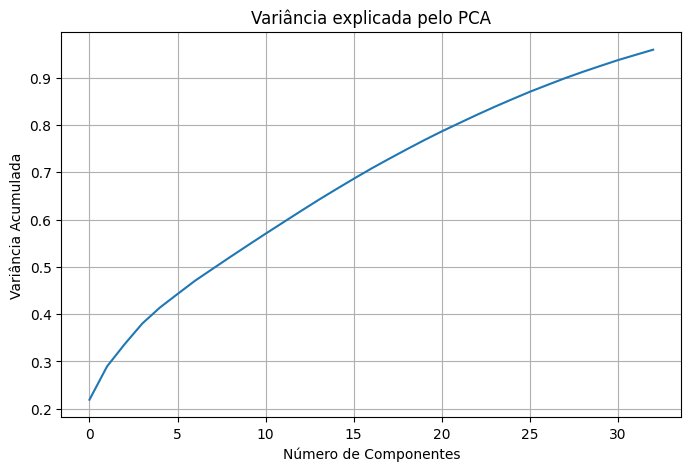

In [107]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância explicada pelo PCA')
plt.grid()
plt.show()

In [108]:
# Define os parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1]
}

# Configura o GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # otimiza pelo MSE
    cv=3,                             # 3 folds (pode ajustar)
    verbose=2,
    n_jobs=-1
)

# Rodar o GridSearch (pode demorar)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE:", -grid_search.best_score_)

r2 = grid_search.best_estimator_.score(X_test, y_test)
print(f"R2 do melhor modelo XGB: {r2:.4f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Melhor MSE: 5726.131267151366
R2 do melhor modelo XGB: 0.4098


### Conclusão

#### Depois de testar vários modelos, o que teve o melhor desempenho até agora foi o XGBRegressor. Ele foi o segundo mais rápido para treinar, ficando atrás apenas da Regressão Linear, que foi quase instantânea — mas teve um resultado bem fraco, como já era esperado. A Árvore de Regressão também não foi bem, com desempenho até pior que o da Regressão Linear, o que surpreendeu um pouco. Como a base de dados original tinha cerca de 3 milhões de linhas, foi necessário usar só 10% dela para conseguir treinar os modelos mais rapidamente. Apesar disso, o XGBoost ainda conseguiu bons resultados, principalmente no MSE (erro quadrático médio), que caiu de aproximadamente 6500 para 5700. Já o R² (que mostra o quanto o modelo entende os dados) não mudou muito entre os modelos. Foi feita uma tentativa de usar o KMeans para criar grupos dentro dos dados, mas isso não ajudou em nada. Depois, também foi testado o PCA, uma técnica para reduzir o número de variáveis mantendo a maior parte das informações. Isso diminuiu o número de colunas de 45 para 33, mas também não trouxe melhorias no desempenho. Até mesmo quando o modelo foi treinado com a base completa, os resultados continuaram praticamente iguais. Isso mostra que o problema não está só no volume de dados, mas talvez na forma como eles estão organizados ou usados.